**This notebook focuses on extracting, transforming, and loading (ETL) data related to Apple Inc. (AAPL) options, followed by an exploratory data analysis (EDA) to uncover insights. It involves data manipulation and visualization techniques to analyze AAPL options data.**

- **Step 1:** ETL (Extract, Transform, Load):
  - **Extract**: Collect data from a specific source, such as AAPL options data.
  - **Transform**: Clean and restructure the data to meet analytical needs, addressing any inconsistencies or missing values.
  - **Load**: Save the cleaned data in a format or database for easy access and analysis.


In [1]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


In [2]:
raw_df = pd.read_csv(r"C:\Users\msi\Desktop\Senior_Semester2\ISS Senior Project\Code\AI-Financial-Assistant\aapl_2016_2020.csv")
raw_df


C:\Users\msi\AppData\Local\Temp\ipykernel_18612\1150442965.py:1: DtypeWarning: Columns (8,9,10,11,12,15,17,18,20,21,23,24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(r"C:\Users\msi\Desktop\Senior_Semester2\ISS Senior Project\Code\AI-Financial-Assistant\aapl_2016_2020.csv")


,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
0,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.00,0.90886,0.00019,...,0.01,-0.00034,0.00011,0.00079,-0.00509,-0.00041,1.625550,0.000000,57.9,0.367
1,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.00,1.0,0.0,...,0.01,-0.00069,0.0001,0.00039,-0.00518,-0.0001,1.461900,200.000000,52.9,0.335
2,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.00,1.0,0.0,...,0.04,-0.00066,0.0002,0.0,-0.00425,-0.00009,1.305490,706.000000,47.9,0.303
3,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.00,1.0,0.0,...,0.01,-0.0012,0.00021,0.00089,-0.00434,-0.00005,1.155130,0.000000,42.9,0.272
4,1546462800,2019-01-02 16:00,2019-01-02,16.0,157.92,2019-01-04,1546635600,2.00,1.0,0.0,...,0.01,-0.00109,0.00024,0.00045,-0.00429,-0.0002,1.010620,0.000000,37.9,0.240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015347,1490990400,2017-03-31 16:00,2017-03-31,16.0,143.67,2019-01-18,1547845200,658.04,0.22786,0.00698,...,0.0,-0.82994,0.00692,0.46146,-0.0087,-2.9731,0.177380,,41.3,0.288
1015348,1490990400,2017-03-31 16:00,2017-03-31,16.0,143.67,2019-01-18,1547845200,658.04,0.19785,0.00656,...,0.0,-0.8806,0.00575,0.35107,-0.00718,-3.1773,0.161320,,46.3,0.322
1015349,1490990400,2017-03-31 16:00,2017-03-31,16.0,143.67,2019-01-18,1547845200,658.04,0.17574,0.006,...,54.02,-0.92501,0.00424,0.23292,-0.00537,-3.36887,0.145280,0.000000,51.3,0.357
1015350,1490990400,2017-03-31 16:00,2017-03-31,16.0,143.67,2019-01-18,1547845200,658.04,0.15074,0.00556,...,58.72,-0.96149,0.00233,0.11114,-0.0036,-3.54558,0.124590,183.000000,56.3,0.392


I always use the `info()` method to look at the raw data. This will usually give me a pretty good picture of the information stored within the dataset.

The `info()` method gives the user each column's index, name, null count, and datatype. It also gives you the size of the dataset, as well as the beginning and final index. This information will be of great use when conducting feature engineering steps such as imputation and scaling, as well as general considerations throughout the project.


In [3]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015352 entries, 0 to 1015351
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   [QUOTE_UNIXTIME]        1015352 non-null  int64  
 1    [QUOTE_READTIME]       1015352 non-null  object 
 2    [QUOTE_DATE]           1015352 non-null  object 
 3    [QUOTE_TIME_HOURS]     1015352 non-null  float64
 4    [UNDERLYING_LAST]      1015352 non-null  float64
 5    [EXPIRE_DATE]          1015352 non-null  object 
 6    [EXPIRE_UNIX]          1015352 non-null  int64  
 7    [DTE]                  1015352 non-null  float64
 8    [C_DELTA]              1015352 non-null  object 
 9    [C_GAMMA]              1015352 non-null  object 
 10   [C_VEGA]               1015352 non-null  object 
 11   [C_THETA]              1015352 non-null  object 
 12   [C_RHO]                1015352 non-null  object 
 13   [C_IV]                 1015352 non-null  object 
 14   [

It always helps to have clean column names. In this notebook, I simply used list comprehension to remove unwanted characters from the raw column names. This makes accessing and reading columns by their names easier.


In [4]:
columns = raw_df.columns
columns = [s.replace('[', '') for s in columns]
columns = [s.replace(']', '') for s in columns]
columns = [s.replace(' ', '') for s in columns]

**Visualize to check code behavior!**

It is important to make sure to visualize your transformations after each step as a method of code verification. We want to make sure that we are changing exactly what we intend to on the dataset, and nothing more.


In [5]:
raw_df.columns = columns

some columns will not be handled well when converting raw numeric strings to Python's integer and float datatypes.
Therefore, we will treat these features separately and join them again later.

In [6]:
date_columns = ['QUOTE_READTIME','QUOTE_DATE','EXPIRE_DATE','QUOTE_TIME_HOURS', 'C_SIZE', 'P_SIZE']
numeric_cols = raw_df.columns.to_list()
numeric_cols.remove('QUOTE_READTIME')
numeric_cols.remove('QUOTE_DATE')
numeric_cols.remove('EXPIRE_DATE')
numeric_cols.remove('QUOTE_TIME_HOURS')
numeric_cols.remove('C_SIZE')
numeric_cols.remove('P_SIZE')

numeric_cols

['QUOTE_UNIXTIME',
 'UNDERLYING_LAST',
 'EXPIRE_UNIX',
 'DTE',
 'C_DELTA',
 'C_GAMMA',
 'C_VEGA',
 'C_THETA',
 'C_RHO',
 'C_IV',
 'C_VOLUME',
 'C_LAST',
 'C_BID',
 'C_ASK',
 'STRIKE',
 'P_BID',
 'P_ASK',
 'P_LAST',
 'P_DELTA',
 'P_GAMMA',
 'P_VEGA',
 'P_THETA',
 'P_RHO',
 'P_IV',
 'P_VOLUME',
 'STRIKE_DISTANCE',
 'STRIKE_DISTANCE_PCT']

In [7]:
numeric_df = raw_df.drop(columns=date_columns)

for i in numeric_cols:
    numeric_df[i] = pd.to_numeric(numeric_df[i], errors='coerce')
    
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015352 entries, 0 to 1015351
Data columns (total 27 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   QUOTE_UNIXTIME       1015352 non-null  int64  
 1   UNDERLYING_LAST      1015352 non-null  float64
 2   EXPIRE_UNIX          1015352 non-null  int64  
 3   DTE                  1015352 non-null  float64
 4   C_DELTA              1015336 non-null  float64
 5   C_GAMMA              1015336 non-null  float64
 6   C_VEGA               1015336 non-null  float64
 7   C_THETA              1015336 non-null  float64
 8   C_RHO                1015336 non-null  float64
 9   C_IV                 946065 non-null   float64
 10  C_VOLUME             690632 non-null   float64
 11  C_LAST               1014138 non-null  float64
 12  C_BID                1014137 non-null  float64
 13  C_ASK                1014137 non-null  float64
 14  STRIKE               1015352 non-null  float64
 15

### Data Analysis Report

We observe that many columns contain missing values. Addressing this issue will be essential in subsequent stages.

The total number of rows in this dataset is **1,015,352**. Consequently, any column with a non-null count less than this figure will exhibit missing values, represented as NaNs. Failure to address this issue may lead to errors during model training.

Furthermore, it is noteworthy that both the `C_SIZE` and `P_SIZE` columns have a non-null count of zero. This warrants further investigation.


It looks like this column has no data, therefore we can drop it from the dataset.
This will organize our dataset and improve operation speed.

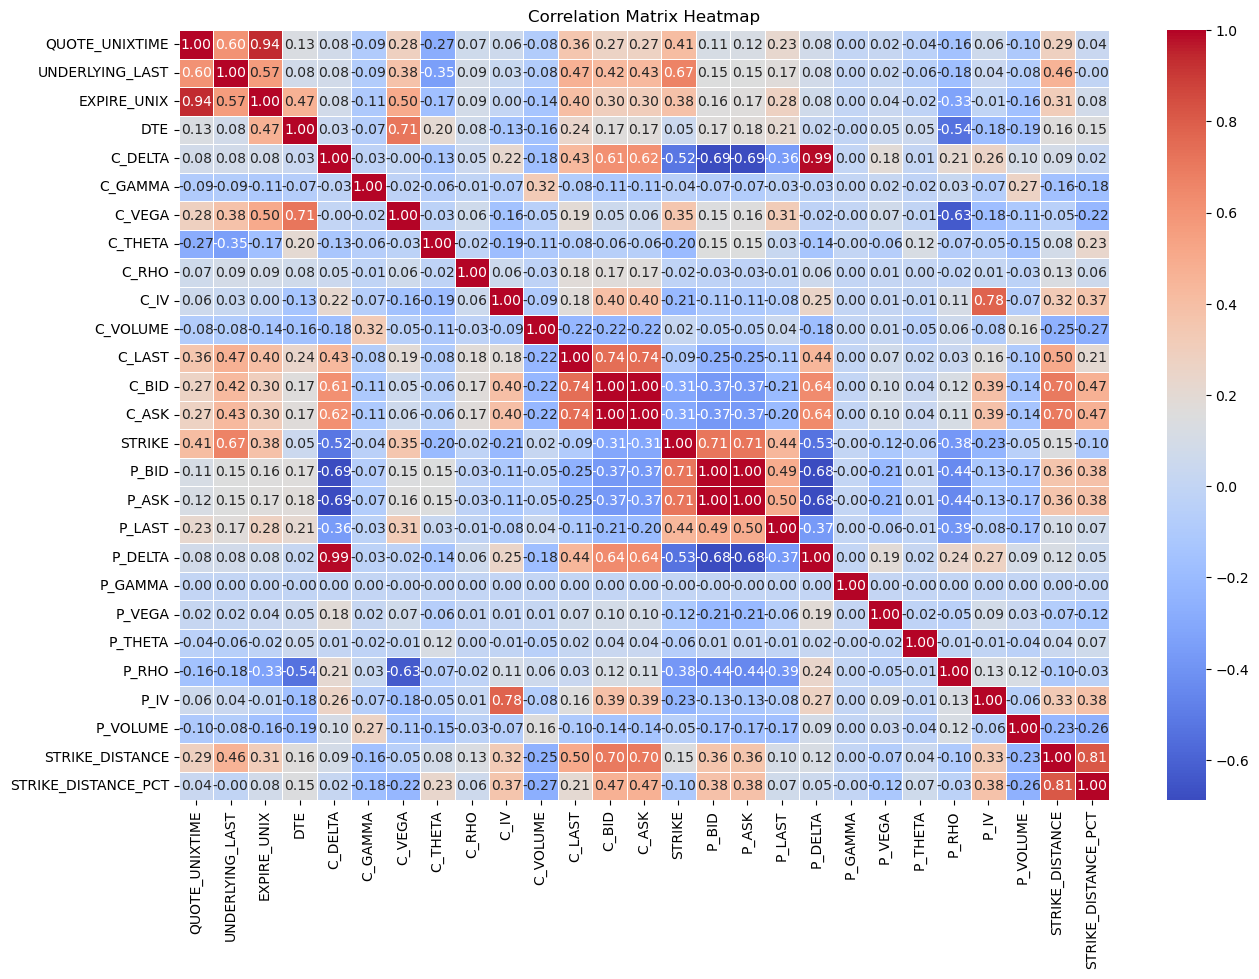

In [10]:


# Generate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()